In [1]:
#import yfinance as yf
# Initial imports
import pandas as pd
#import numpy as np
import datetime as dt
#from pathlib import Path
import hvplot.pandas
%matplotlib inline

import os
import requests
#from dotenv import load_dotenv
#import alpaca_trade_api as tradeapi
#from MCForecastTools import MCSimulation
import pandas_datareader as web
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns
 
import matplotlib.pyplot as plt

import matplotlib.dates as mdates


In [2]:
start = dt.datetime(2020,1,1)
end = dt.datetime(2021,10,2)
start,end

(datetime.datetime(2020, 1, 1, 0, 0), datetime.datetime(2021, 10, 2, 0, 0))

In [3]:
# Set the tickers
tickers = ["AZN", "PFE", "JNJ", "CRM", "GOOG", "MSFT", "CLX", "PROC", "CHD", "GM", "VWAGY", "TYO"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [4]:
#PHARMA
azn = web.get_data_yahoo('AZN', start,end)
pfe = web.get_data_yahoo('PFE', start,end)
jnj = web.get_data_yahoo('JNJ', start,end)

In [5]:
#TECH
crm = web.get_data_yahoo('CRM', start,end)
goog = web.get_data_yahoo('GOOG', start,end)
msft = web.get_data_yahoo('MSFT', start,end)

In [6]:
#CONSUMERS
clx = web.get_data_yahoo('CLX', start,end)
proc = web.get_data_yahoo('PROC', start,end)
chd = web.get_data_yahoo('CHD', start,end)

In [7]:
#AUTO
gm = web.get_data_yahoo('GM', start,end)
vwagy = web.get_data_yahoo('VWAGY', start,end)
tyo = web.get_data_yahoo('TYO', start,end)

In [8]:
#AUTO
df_vwagy = pd.DataFrame(vwagy, columns=['Close'])
df_vwagy = df_vwagy.rename(columns = {'Close':'VWAGY'})

df_gm = pd.DataFrame(gm, columns=['Close'])
df_gm = df_gm.rename(columns = {'Close':'GM'})

df_tyo = pd.DataFrame(tyo, columns=['Close'])
df_tyo = df_tyo.rename(columns = {'Close':'TYO'})

In [9]:
all_auto = pd.concat([df_vwagy,df_gm,df_tyo], axis="columns", join="inner")
all_auto.head()

VWAGY         GM    TYO
Date                                   
2020-01-02  19.889999  37.380001  10.93
2020-01-03  19.410000  36.320000  10.72
2020-01-06  19.620001  35.840000  10.79
2020-01-07  19.520000  35.150002  10.82
2020-01-08  19.670000  34.650002  10.89

In [10]:
#PHARMA
df_azn = pd.DataFrame(azn, columns=['Close'])
df_azn = df_azn.rename(columns = {'Close':'AZN'})

df_pfe = pd.DataFrame(pfe, columns=['Close'])
df_pfe = df_pfe.rename(columns = {'Close':'PFE'})

df_jnj = pd.DataFrame(jnj, columns=['Close'])
df_jnj = df_jnj.rename(columns = {'Close':'JNJ'})

In [11]:
all_pharma = pd.concat([df_pfe,df_jnj,df_azn], axis="columns", join="inner")
all_pharma.head()

PFE         JNJ        AZN
Date                                        
2020-01-02  37.134724  145.970001  50.389999
2020-01-03  36.935486  144.279999  50.090000
2020-01-06  36.888046  144.100006  49.880001
2020-01-07  36.764706  144.979996  50.070000
2020-01-08  37.058823  144.960007  49.950001

In [12]:
#CONSUMERS
df_clx = pd.DataFrame(clx, columns=['Close'])
df_clx = df_clx.rename(columns = {'Close':'CLX'})

df_proc = pd.DataFrame(pfe, columns=['Close'])
df_proc = df_proc.rename(columns = {'Close':'PROC'})

df_chd = pd.DataFrame(jnj, columns=['Close'])
df_chd = df_chd.rename(columns = {'Close':'CHD'})

In [13]:
all_consumers = pd.concat([df_clx,df_proc,df_chd], axis="columns", join="inner")
all_consumers.head()

CLX       PROC         CHD
Date                                         
2020-01-02  152.610001  37.134724  145.970001
2020-01-03  152.910004  36.935486  144.279999
2020-01-06  153.369995  36.888046  144.100006
2020-01-07  151.520004  36.764706  144.979996
2020-01-08  151.970001  37.058823  144.960007

In [14]:
#TECH
df_crm = pd.DataFrame(crm, columns=['Close'])
df_crm = df_crm.rename(columns = {'Close':"CRM"})

df_goog = pd.DataFrame(goog, columns=['Close'])
df_goog = df_goog.rename(columns = {'Close':'GOOG'})

df_msft = pd.DataFrame(msft, columns=['Close'])
df_msft = df_msft.rename(columns = {'Close':'MSFT'})


In [15]:
all_tech = pd.concat([df_crm,df_goog,df_msft], axis="columns", join="inner")
all_tech.head()

CRM         GOOG        MSFT
Date                                           
2020-01-02  166.990005  1367.369995  160.619995
2020-01-03  166.169998  1360.660034  158.619995
2020-01-06  173.449997  1394.209961  159.029999
2020-01-07  176.000000  1393.339966  157.580002
2020-01-08  177.330002  1404.319946  160.089996

In [16]:
#All Dataframes 
all_df = pd.concat([all_tech,all_consumers,all_auto,all_pharma], axis="columns", join="inner")
all_df

CRM         GOOG        MSFT         CLX       PROC  \
Date                                                                     
2020-01-02  166.990005  1367.369995  160.619995  152.610001  37.134724   
2020-01-03  166.169998  1360.660034  158.619995  152.910004  36.935486   
2020-01-06  173.449997  1394.209961  159.029999  153.369995  36.888046   
2020-01-07  176.000000  1393.339966  157.580002  151.520004  36.764706   
2020-01-08  177.330002  1404.319946  160.089996  151.970001  37.058823   
...                ...          ...         ...         ...        ...   
2021-09-27  279.679993  2830.020020  294.170013  164.869995  43.570000   
2021-09-28  272.279999  2723.679932  283.519989  166.660004  43.040001   
2021-09-29  270.500000  2690.419922  284.000000  168.110001  43.529999   
2021-09-30  271.220001  2665.310059  281.920013  165.610001  43.009998   
2021-10-01  275.260010  2729.250000  289.100006  164.520004  42.930000   

                   CHD      VWAGY         GM    TYO        PFE         JNJ  \
Date                                                                         
2020-01-02  145.970001  19.889999  37.380001  10.93  37.134724  145.970001   
2020-01-03  144.279999  19.410000  36.320000  10.72  36.935486  144.279999   
2020-01-06  144.100006  19.620001  35.840000  10.79  36.888046  144.100006   
2020-01-07  144.979996  19.520000  35.150002  10.82  36.764706  144.979996   
2020-01-08  144.960007  19.670000  34.650002  10.89  37.058823  144.960007   
...                ...        ...        ...    ...        ...         ...   
2021-09-27  163.169998  32.119999  53.240002   8.58  43.570000  163.169998   
2021-09-28  162.809998  31.719999  52.849998   8.68  43.040001  162.809998   
2021-09-29  164.020004  31.809999  52.930000   8.65  43.529999  164.020004   
2021-09-30  161.500000  31.120001  52.709999   8.55  43.009998  161.500000   
2021-10-01  160.470001  31.170000  53.130001   8.51  42.930000  160.470001   

                  AZN  
Date                   
2020-01-02  50.389999  
2020-01-03  50.090000  
2020-01-06  49.880001  
2020-01-07  50.070000  
2020-01-08  49.950001  
...               ...  
2021-09-27  58.720001  
2021-09-28  57.630001  
2021-09-29  59.669998  
2021-09-30  60.060001  
2021-10-01  59.680000  

[442 rows x 12 columns]

In [17]:
###Calculating Percent Change 
daily_tech_returns= all_tech.pct_change() 
daily_tech_returns.head()

CRM      GOOG      MSFT
Date                                    
2020-01-02       NaN       NaN       NaN
2020-01-03 -0.004911 -0.004907 -0.012452
2020-01-06  0.043811  0.024657  0.002585
2020-01-07  0.014702 -0.000624 -0.009118
2020-01-08  0.007557  0.007880  0.015928

In [18]:
#Tech Avg
daily_tech_returns['Tech Avg'] = daily_tech_returns.iloc[:, 0:442].mean(axis=1)
daily_tech_returns

CRM      GOOG      MSFT  Tech Avg
Date                                              
2020-01-02       NaN       NaN       NaN       NaN
2020-01-03 -0.004911 -0.004907 -0.012452 -0.007423
2020-01-06  0.043811  0.024657  0.002585  0.023684
2020-01-07  0.014702 -0.000624 -0.009118  0.001653
2020-01-08  0.007557  0.007880  0.015928  0.010455
...              ...       ...       ...       ...
2021-09-27 -0.020831 -0.007936 -0.017304 -0.015357
2021-09-28 -0.026459 -0.037576 -0.036204 -0.033413
2021-09-29 -0.006537 -0.012211  0.001693 -0.005685
2021-09-30  0.002662 -0.009333 -0.007324 -0.004665
2021-10-01  0.014896  0.023990  0.025468  0.021451

[442 rows x 4 columns]

In [19]:
##Percent Change Auto 
daily_auto_returns = all_auto.pct_change()
daily_auto_returns.head()

VWAGY        GM       TYO
Date                                    
2020-01-02       NaN       NaN       NaN
2020-01-03 -0.024133 -0.028357 -0.019213
2020-01-06  0.010819 -0.013216  0.006530
2020-01-07 -0.005097 -0.019252  0.002780
2020-01-08  0.007684 -0.014225  0.006470

In [20]:
#Auto Avg
daily_auto_returns['Auto Avg'] = daily_auto_returns.iloc[:, 0:442].mean(axis=1)
#daily_auto_returns.drop(daily_auto_returns.columns[3],axis=1, inplace=True)
daily_auto_returns

VWAGY        GM       TYO  Auto Avg
Date                                              
2020-01-02       NaN       NaN       NaN       NaN
2020-01-03 -0.024133 -0.028357 -0.019213 -0.023901
2020-01-06  0.010819 -0.013216  0.006530  0.001378
2020-01-07 -0.005097 -0.019252  0.002780 -0.007190
2020-01-08  0.007684 -0.014225  0.006470 -0.000024
...              ...       ...       ...       ...
2021-09-27  0.023321  0.019338  0.007042  0.016567
2021-09-28 -0.012453 -0.007325  0.011655 -0.002708
2021-09-29  0.002837  0.001514 -0.003456  0.000298
2021-09-30 -0.021691 -0.004156 -0.011561 -0.012469
2021-10-01  0.001607  0.007968 -0.004678  0.001632

[442 rows x 4 columns]

In [21]:
#Percent Change Consumers
daily_consumer_returns = all_consumers.pct_change()
daily_consumer_returns.head()

CLX      PROC       CHD
Date                                    
2020-01-02       NaN       NaN       NaN
2020-01-03  0.001966 -0.005365 -0.011578
2020-01-06  0.003008 -0.001284 -0.001248
2020-01-07 -0.012062 -0.003344  0.006107
2020-01-08  0.002970  0.008000 -0.000138

In [22]:
#Consumer Avg
daily_consumer_returns['Consumer Avg'] = daily_consumer_returns.iloc[:, 0:442].mean(axis=1)
daily_consumer_returns

CLX      PROC       CHD  Consumer Avg
Date                                                  
2020-01-02       NaN       NaN       NaN           NaN
2020-01-03  0.001966 -0.005365 -0.011578     -0.004992
2020-01-06  0.003008 -0.001284 -0.001248      0.000159
2020-01-07 -0.012062 -0.003344  0.006107     -0.003100
2020-01-08  0.002970  0.008000 -0.000138      0.003611
...              ...       ...       ...           ...
2021-09-27  0.001884 -0.008421 -0.007240     -0.004592
2021-09-28  0.010857 -0.012164 -0.002206     -0.001171
2021-09-29  0.008700  0.011385  0.007432      0.009172
2021-09-30 -0.014871 -0.011946 -0.015364     -0.014060
2021-10-01 -0.006582 -0.001860 -0.006378     -0.004940

[442 rows x 4 columns]

In [23]:
#Percent Change Pharma
daily_pharma_returns = all_pharma.pct_change()
daily_pharma_returns.head()

PFE       JNJ       AZN
Date                                    
2020-01-02       NaN       NaN       NaN
2020-01-03 -0.005365 -0.011578 -0.005954
2020-01-06 -0.001284 -0.001248 -0.004192
2020-01-07 -0.003344  0.006107  0.003809
2020-01-08  0.008000 -0.000138 -0.002397

In [24]:
#Pharma Avg
daily_pharma_returns['Pharma Avg'] = daily_pharma_returns.iloc[:, 0:442].mean(axis=1)
daily_pharma_returns

PFE       JNJ       AZN  Pharma Avg
Date                                                
2020-01-02       NaN       NaN       NaN         NaN
2020-01-03 -0.005365 -0.011578 -0.005954   -0.007632
2020-01-06 -0.001284 -0.001248 -0.004192   -0.002241
2020-01-07 -0.003344  0.006107  0.003809    0.002191
2020-01-08  0.008000 -0.000138 -0.002397    0.001822
...              ...       ...       ...         ...
2021-09-27 -0.008421 -0.007240 -0.027009   -0.014223
2021-09-28 -0.012164 -0.002206 -0.018563   -0.010978
2021-09-29  0.011385  0.007432  0.035398    0.018072
2021-09-30 -0.011946 -0.015364  0.006536   -0.006925
2021-10-01 -0.001860 -0.006378 -0.006327   -0.004855

[442 rows x 4 columns]

In [25]:
daily_returns = (all_df - all_df.shift(1)) / all_df.shift(1)
daily_returns.sample(5)

CRM      GOOG      MSFT       CLX      PROC       CHD  \
Date                                                                     
2021-08-16 -0.009381  0.003685  0.005976  0.008549  0.008870  0.009021   
2020-04-20  0.000861 -0.012967 -0.019821 -0.005530 -0.022487 -0.002302   
2020-03-06 -0.032547 -0.015640 -0.028267 -0.014729 -0.012408  0.000141   
2021-05-04 -0.029407 -0.017084 -0.016160  0.010906  0.003013  0.015495   
2020-11-06 -0.000269 -0.000919  0.001926  0.023946  0.000275  0.017816   

               VWAGY        GM       TYO       PFE       JNJ       AZN  
Date                                                                    
2021-08-16 -0.030303 -0.013048 -0.008475  0.008870  0.009021  0.004617  
2020-04-20  0.002049 -0.004448 -0.008761 -0.022487 -0.002302  0.008195  
2020-03-06  0.005367 -0.046844 -0.027397 -0.012408  0.000141 -0.017776  
2021-05-04 -0.038558 -0.031671 -0.005488  0.003013  0.015495 -0.014339  
2020-11-06 -0.002917  0.008885  0.011392  0.000275  0.017816  0.006526

<AxesSubplot:xlabel='Date'>

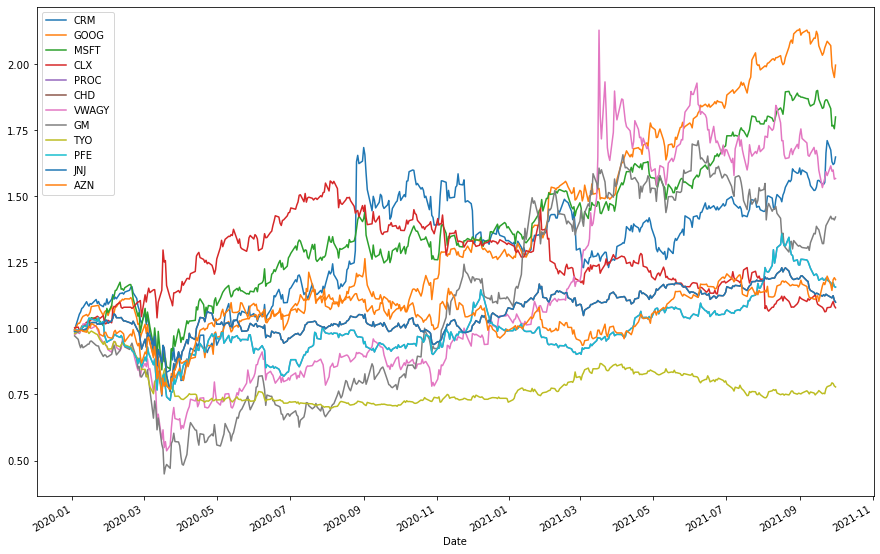

In [26]:
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(15,10))

<AxesSubplot:xlabel='Date'>

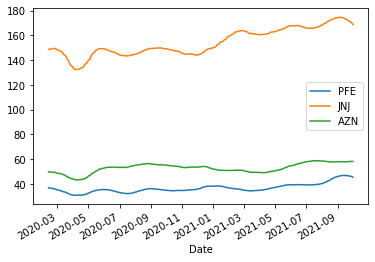

In [27]:
all_pharma.rolling(window=30).mean().plot()

<AxesSubplot:xlabel='Date'>

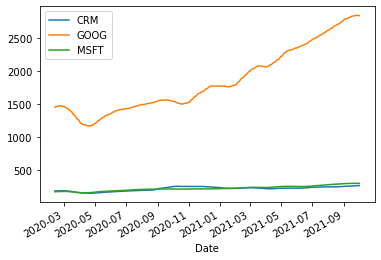

In [28]:
all_tech.rolling(window=30).mean().plot()

<AxesSubplot:xlabel='Date'>

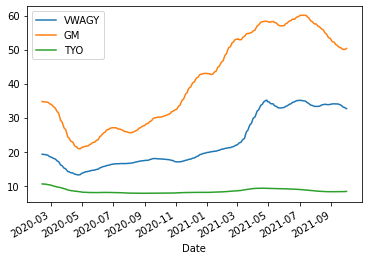

In [29]:
all_auto.rolling(window=30).mean().plot()

<AxesSubplot:xlabel='Date'>

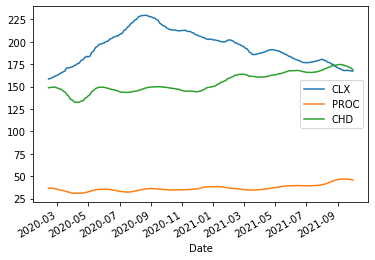

In [30]:
#Rolling average Consumers
all_consumers.rolling(window=30).mean().plot()

<AxesSubplot:xlabel='Date'>

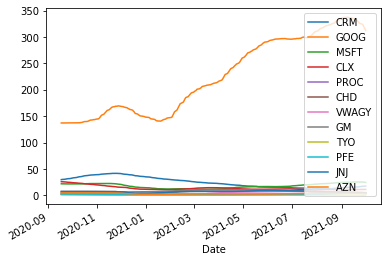

In [31]:
# Plot a rolling 7-day std dev of MSFT's closing prices
all_df.rolling(window=180).std().plot()

In [32]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility 
volatility = daily_returns.std() * np.sqrt(252) 
volatility.sort_values(inplace=True, ascending=False) 
volatility

VWAGY    0.533129
GM       0.526221
CRM      0.434113
MSFT     0.358213
GOOG     0.329123
AZN      0.310000
PROC     0.300777
PFE      0.300777
CLX      0.293179
CHD      0.248227
JNJ      0.248227
TYO      0.188112
dtype: float64

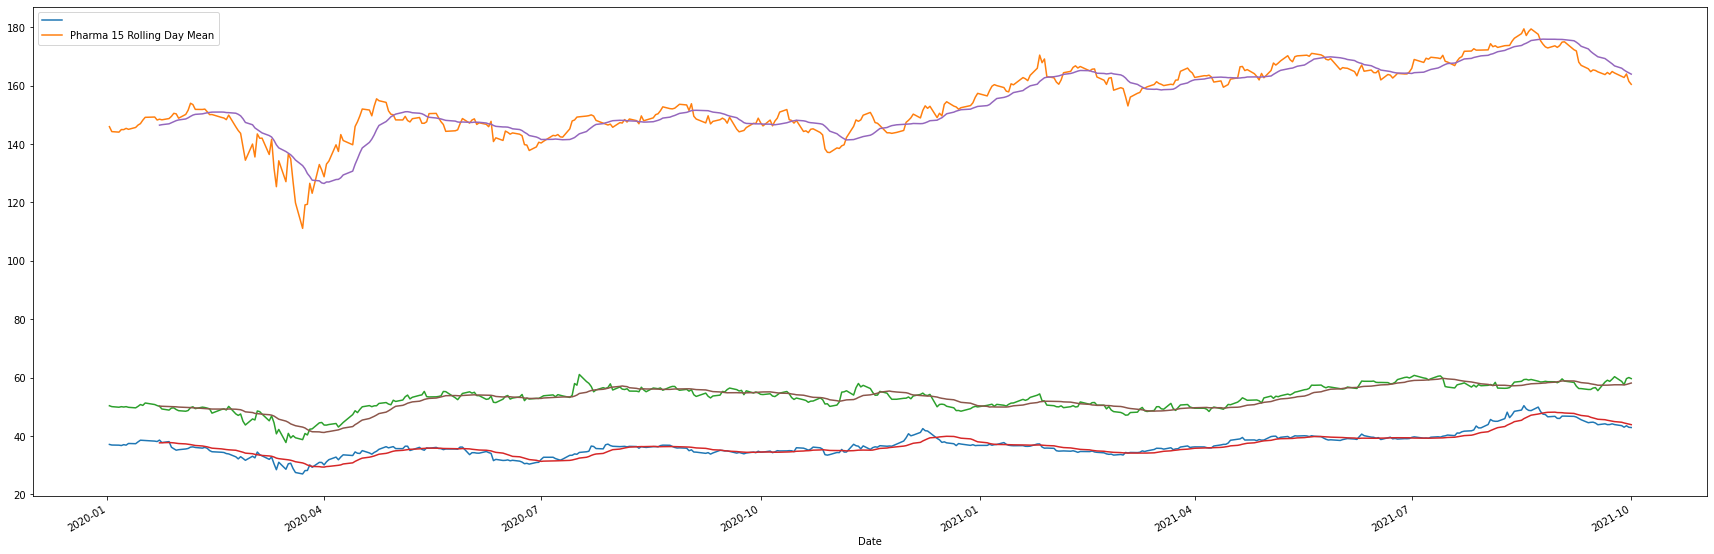

In [33]:
# Set figure of the daily closing prices of Pharma
ax = all_pharma.plot(figsize=(30,10))

# Plot 180-Day Rolling Mean on the same figure
all_pharma.rolling(window=15).mean().plot(ax=ax)

# Set the legend of the figure
ax.legend(["", "Pharma 15 Rolling Day Mean"]);

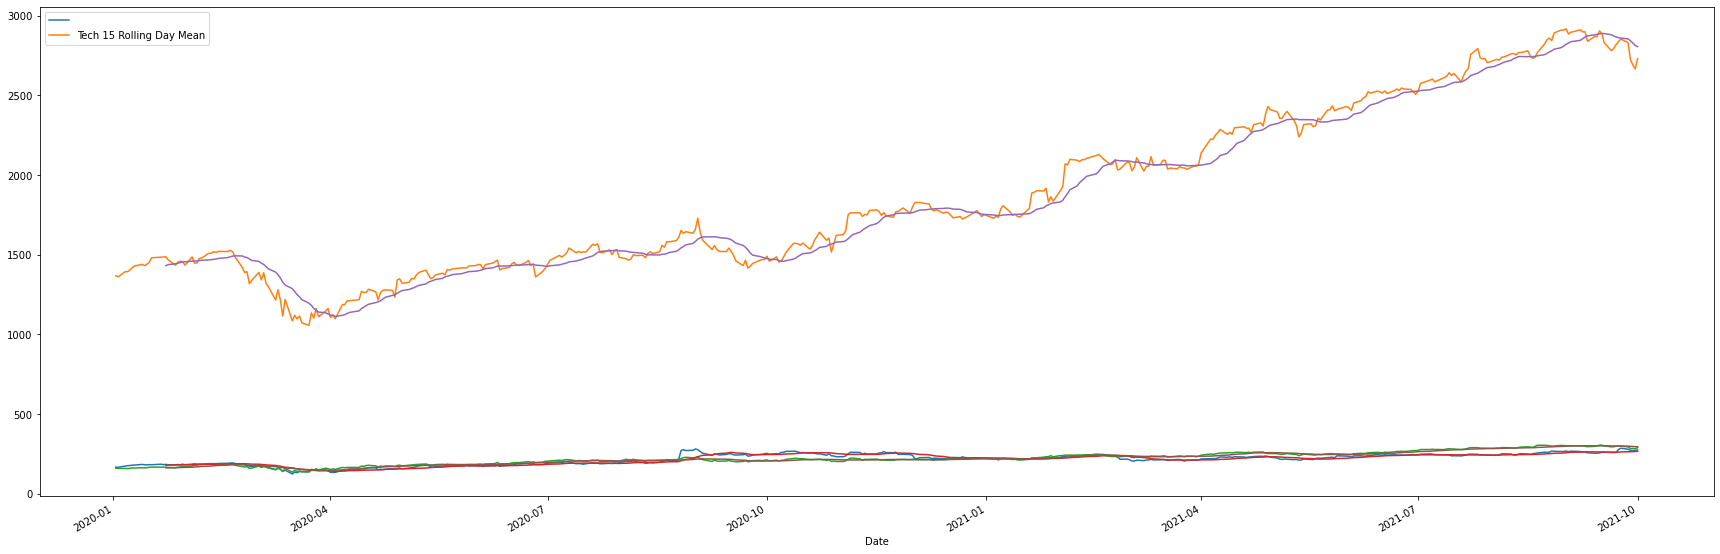

In [34]:
# Set figure of the daily closing prices of Tech
ax = all_tech.plot(figsize=(30,10))

# Plot 180-Day Rolling Mean on the same figure
all_tech.rolling(window=15).mean().plot(ax=ax)

# Set the legend of the figure
ax.legend(["", "Tech 15 Rolling Day Mean"]);

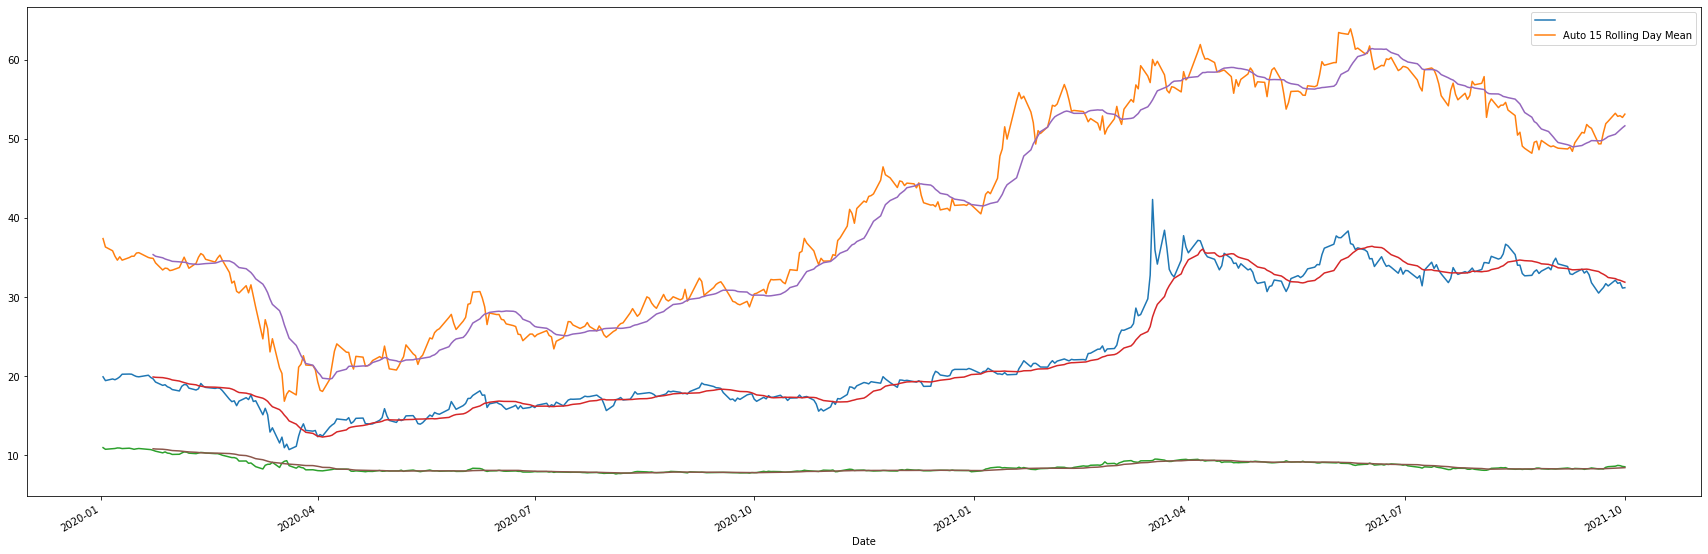

In [35]:
# Set figure of the daily closing prices of Auto
ax = all_auto.plot(figsize=(30,10))

# Plot 180-Day Rolling Mean on the same figure
all_auto.rolling(window=15).mean().plot(ax=ax)

# Set the legend of the figure
ax.legend(["", "Auto 15 Rolling Day Mean"]);

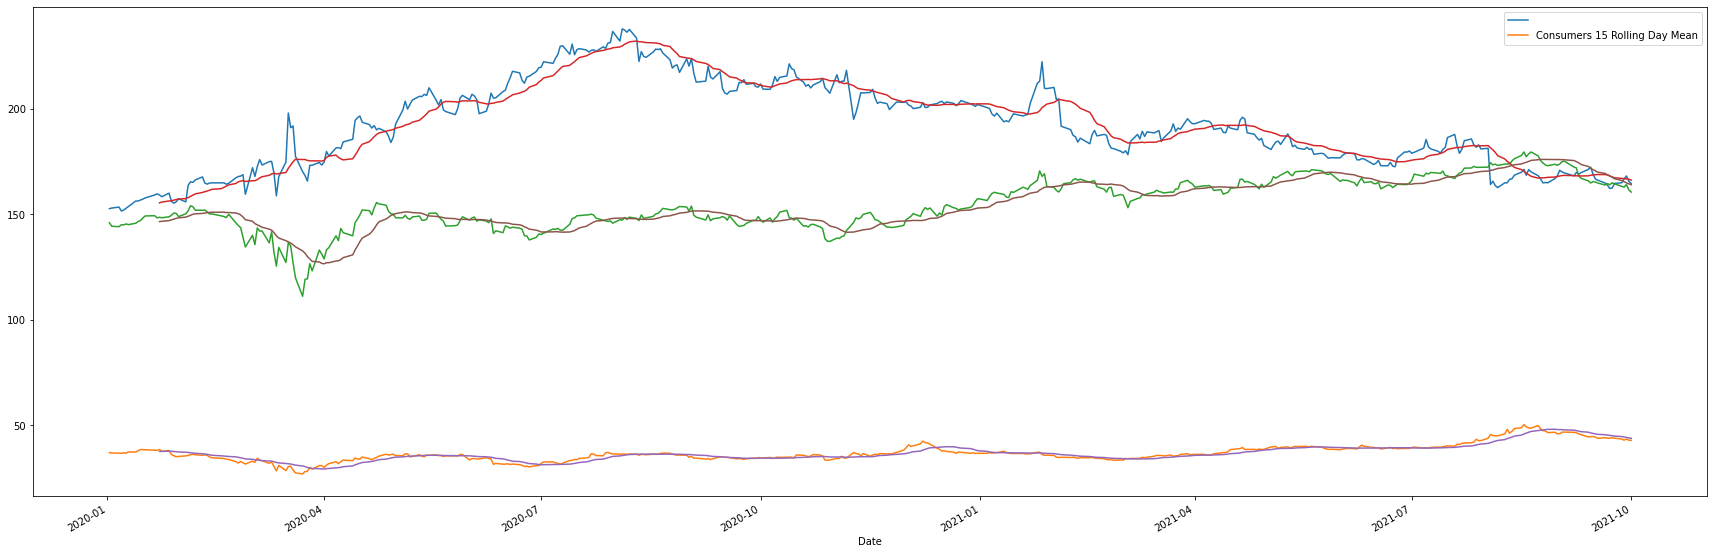

In [36]:
# Set figure of the daily closing prices of Consumer
ax = all_consumers.plot(figsize=(30,10))

# Plot 180-Day Rolling Mean on the same figure
all_consumers.rolling(window=15).mean().plot(ax=ax)

# Set the legend of the figure
ax.legend(["", "Consumers 15 Rolling Day Mean"]);

In [37]:
#all_df.plot(kind='bar', figsize=(25,10))
#all_df = (1 + returns).cumprod()
#all_df.head()

# Plot cumulative returns
#all_df.plot(figsize=(30,10))

In [38]:
##daily_returns.plot.box(figsize=(10,5)

In [39]:
#Plot Averages

In [40]:
#all_df_avg = pd.concat([all_tech,all_consumers,all_auto,all_pharma], axis="Pharma Avg", join="inner")


In [41]:
pharma_avg = daily_pharma_returns['Pharma Avg']
tech_avg = daily_tech_returns['Tech Avg']
auto_avg = daily_auto_returns['Auto Avg']
consumer_avg = daily_consumer_returns['Consumer Avg']


In [42]:
all_avg = pd.concat([pharma_avg, tech_avg, auto_avg, consumer_avg], axis="columns", join="inner")
all_avg

Pharma Avg  Tech Avg  Auto Avg  Consumer Avg
Date                                                    
2020-01-02         NaN       NaN       NaN           NaN
2020-01-03   -0.007632 -0.007423 -0.023901     -0.004992
2020-01-06   -0.002241  0.023684  0.001378      0.000159
2020-01-07    0.002191  0.001653 -0.007190     -0.003100
2020-01-08    0.001822  0.010455 -0.000024      0.003611
...                ...       ...       ...           ...
2021-09-27   -0.014223 -0.015357  0.016567     -0.004592
2021-09-28   -0.010978 -0.033413 -0.002708     -0.001171
2021-09-29    0.018072 -0.005685  0.000298      0.009172
2021-09-30   -0.006925 -0.004665 -0.012469     -0.014060
2021-10-01   -0.004855  0.021451  0.001632     -0.004940

[442 rows x 4 columns]

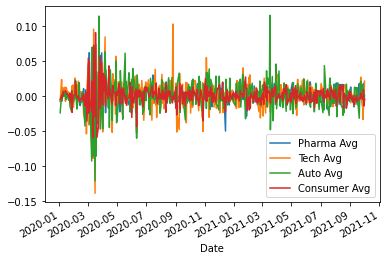

In [43]:
 # Set figure of the daily closing prices of MSFT
alv = all_avg.plot()

# Plot 180-Day Rolling Mean on the same figure
all_avg.rolling(window=15).mean().plot(ax=ax)

# Set the legend of the figure
alv.legend(["Pharma Avg", "Tech Avg","Auto Avg","Consumer Avg"]);



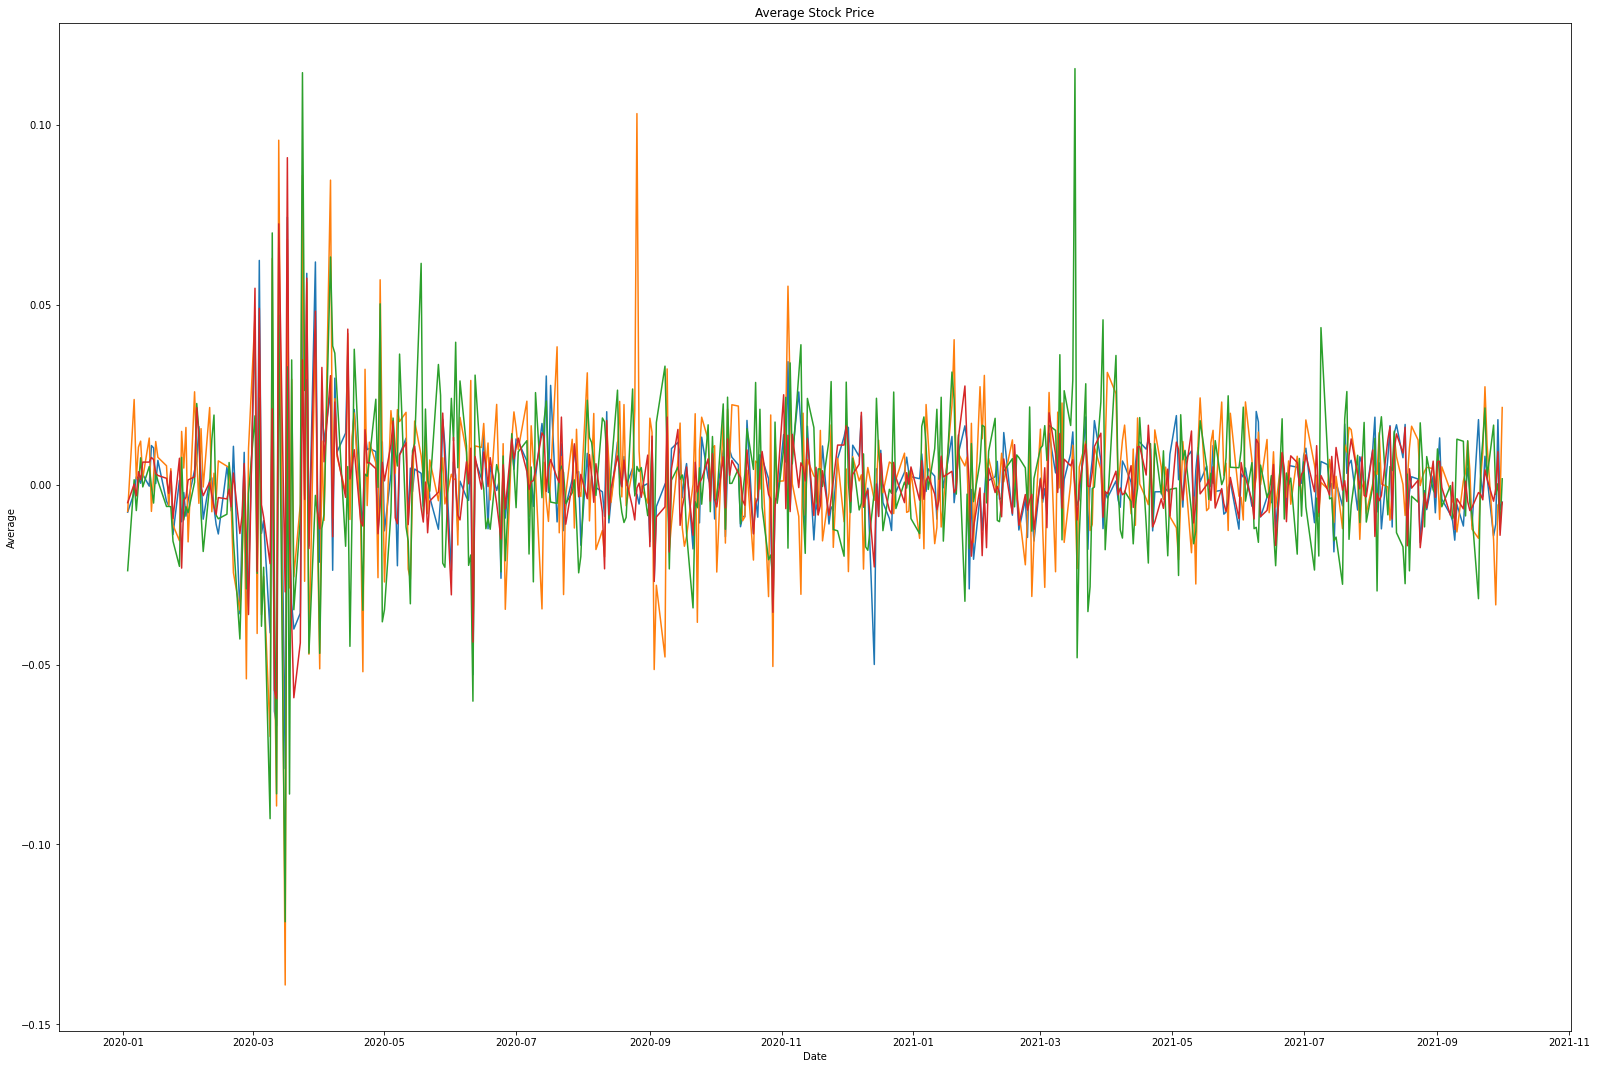

In [81]:
#all_avg.plot(kind='bar',figsize=(40,8))
#.autofmt_xdate()

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,3.5,3.5])
ax1.plot(all_avg)
ax1.set_xlabel("Date")
ax1.set_ylabel("Average")
ax1.set_title("Average Stock Price")
plt.show()

In [45]:
all_avg.hvplot.bar(title='Stock Performance')


:Bars   [Date,Variable]   (value)

In [46]:
all_avg.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [47]:
# Compose plots
plot_tech = tech_avg.hvplot(label='Tech Avg')
plot_pharma = pharma_avg.hvplot(label='Pharma Avg')
plot_pharma + plot_tech


:Layout
   .Curve.Pharma_Avg :Curve   [Date]   (Pharma Avg)
   .Curve.Tech_Avg   :Curve   [Date]   (Tech Avg)

In [48]:
plot_consumer = consumer_avg.hvplot(label='Consumer Avg')
plot_auto = auto_avg.hvplot(label='Auto Avg')
plot_consumer + plot_auto


:Layout
   .Curve.Consumer_Avg :Curve   [Date]   (Consumer Avg)
   .Curve.Auto_Avg     :Curve   [Date]   (Auto Avg)

In [49]:
plot_pharma * plot_tech * plot_auto * plot_consumer

:Overlay
   .Curve.Pharma_Avg   :Curve   [Date]   (Pharma Avg)
   .Curve.Tech_Avg     :Curve   [Date]   (Tech Avg)
   .Curve.Auto_Avg     :Curve   [Date]   (Auto Avg)
   .Curve.Consumer_Avg :Curve   [Date]   (Consumer Avg)

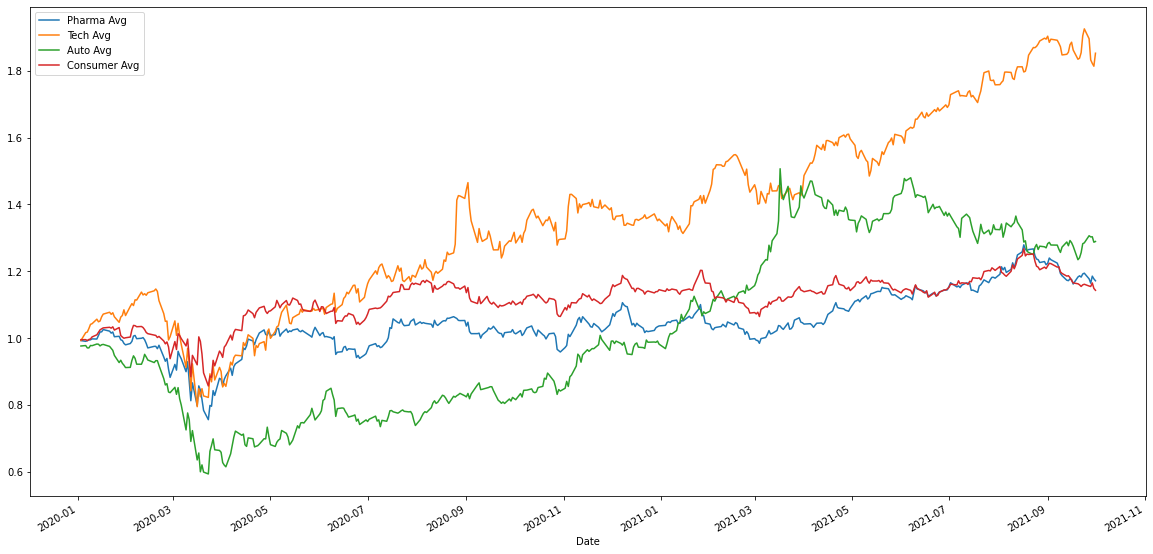

In [50]:
cumulative_avg_returns = (1 + all_avg).cumprod()
#cumulative_avg_profits = (initial_investment * cumulative_portfolio_returns)
cumulative_avg_returns.plot(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.WeekdayLocator())


In [51]:
#diversified portfolio return
initial_investment = 10000
weights = [.25, .25, .25, .25]
#all_portfolio_returns = all_avg.dot(weights)
#cumulative_portfolio_returns = (1 + all_portfolio_returns).cumprod()
#cumulative_portfolio_profits = (initial_investment * cumulative_portfolio_returns)
#cumulative_portfolio_profits.plot(figsize=(20,10))



In [52]:
print(f"Initial Investment: {str(initial_investment)}")

Initial Investment: 10000


In [53]:
#Greatest increase in profits
#greatest_increase = max(profits)
#greatest_index = profits.index(greatest_increase)
#greatest_date = dates[greatest_index]

#Greatest decrease (lowest increase) in profits 
#greatest_decrease = min(profits)
#worst_index = profits.index(greatest_decrease)
#worst_date = dates[worst_index]

#Average change in "Profit/Losses between months over entire period"
#avg_change = sum(profits)/len(profits)
    


<AxesSubplot:xlabel='Date'>

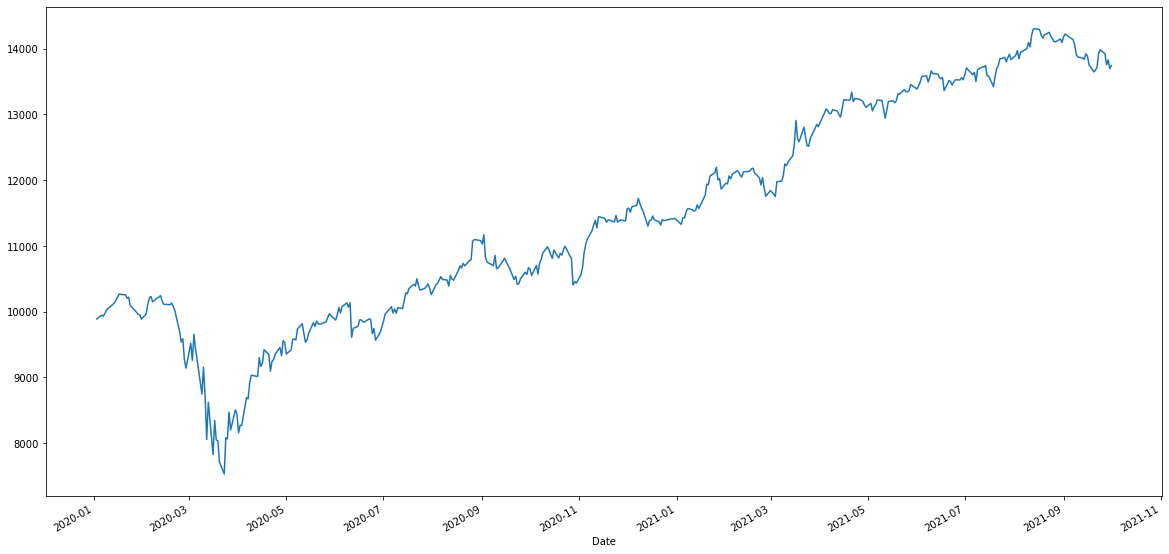

In [54]:
#diversified portfolio return
initial_investment = 10000
weights = [.25, .25, .25, .25]
all_portfolio_returns = all_avg.dot(weights)
cumulative_portfolio_returns = (1 + all_portfolio_returns).cumprod()
cumulative_portfolio_profits = (initial_investment * cumulative_portfolio_returns)
cumulative_portfolio_profits.plot(figsize=(20,10))



In [55]:
#correlation = daily_returns.corr() 
#correlation


In [56]:
#sns.heatmap(correlation, vmin=-1, vmax=1) 

In [57]:
#correlation.sum(axis=0).sort_values()

In [58]:
#MRNA = float(df_mrna["MRNA"]["Close"])
#PFE = float(df_pfe["PFE"]["Close"])
#JNJ = float(df_jnj["JNJ"]["Close"])
# Print AGG and SPY close prices
#print(f"Current MRNA closing price: ${mrna_close_price}")
#print(f"Current SPY closing price: ${spy_close_price}")

In [59]:
# annualise daily returns. 252 trading days in a year

annual_tech_returns = daily_tech_returns.mean() * 252
annual_tech_returns

CRM         0.377914
GOOG        0.449384
MSFT        0.400235
Tech Avg    0.409177
dtype: float64

In [60]:
port_returns_tech = np.sum(.25 * annual_tech_returns)
port_returns_tech

0.40917746566552377

In [61]:
print(str(round(port_returns_tech * 100, 2)) + '%')

40.92%


In [62]:
annual_pharma_returns = daily_pharma_returns.mean() * 252
annual_pharma_returns

PFE           0.127994
JNJ           0.084772
AZN           0.144810
Pharma Avg    0.119192
dtype: float64

In [63]:
port_returns_pharma = np.sum(.25 * annual_pharma_returns)
port_returns_pharma

0.11919179617614743

In [64]:
print(str(round(port_returns_pharma * 100, 2)) + '%')

11.92%


In [65]:
annual_auto_returns = daily_auto_returns.mean() * 252
annual_auto_returns

VWAGY       0.396143
GM          0.339570
TYO        -0.125243
Auto Avg    0.203490
dtype: float64

In [66]:
port_returns_auto = np.sum(.25 * annual_auto_returns)
port_returns_auto

0.20349006404342374

In [67]:
print(str(round(port_returns_auto * 100, 2)) + '%')

20.35%


In [68]:
annual_consumer_returns = daily_consumer_returns.mean() * 252
annual_consumer_returns

CLX             0.085888
PROC            0.127994
CHD             0.084772
Consumer Avg    0.099551
dtype: float64

In [69]:
port_returns_consumer = np.sum(.25 * annual_consumer_returns)
port_returns_consumer

0.09955127038380876

In [70]:
print(str(round(port_returns_consumer * 100, 2)) + '%')

9.96%


In [71]:
#Annualized Returns per Sector
print(f"Tech Annualized Returns {str(round(port_returns_tech * 100, 2)) + '%'}")
print(f"Pharma Annualized Returns {str(round(port_returns_pharma * 100, 2)) + '%'}")
print(f"Auto Annualized Returns {str(round(port_returns_auto * 100, 2)) + '%'}")
print(f"Consumer Annualized Returns {str(round(port_returns_consumer * 100, 2)) + '%'}")


Tech Annualized Returns 40.92%
Pharma Annualized Returns 11.92%
Auto Annualized Returns 20.35%
Consumer Annualized Returns 9.96%


Tech Annualized Returns 40.92%
Pharma Annualized Returns 11.92%
Auto Annualized Returns 20.35%
Consumer Annualized Returns 9.96%


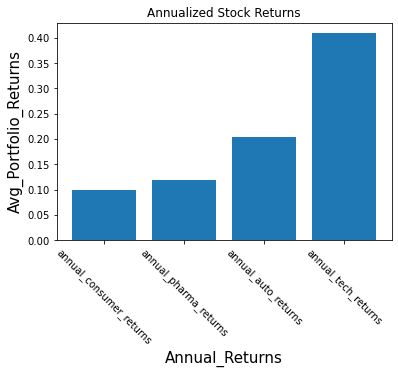

In [72]:
#Graphical presentation of annualized returns
Annual_Returns=['annual_consumer_returns', 'annual_pharma_returns', 'annual_auto_returns', 'annual_tech_returns']
Avg_Portfolio_Returns = [port_returns_consumer, port_returns_pharma, port_returns_auto, port_returns_tech]
# Creating a simple bar chart
plt.bar(Annual_Returns, Avg_Portfolio_Returns)
plt.title('Annualized Stock Returns')
plt.xlabel('Annual_Returns',fontsize=15)
plt.ylabel('Avg_Portfolio_Returns', fontsize=15)
plt.xticks (rotation=-45)
#axes.set_ylim([0,25])
#yticks= plt.PercentFormatter(0.5)

print(f"Tech Annualized Returns {str(round(port_returns_tech * 100, 2)) + '%'}")
print(f"Pharma Annualized Returns {str(round(port_returns_pharma * 100, 2)) + '%'}")
print(f"Auto Annualized Returns {str(round(port_returns_auto * 100, 2)) + '%'}")
print(f"Consumer Annualized Returns {str(round(port_returns_consumer * 100, 2)) + '%'}")

plt.show()

In [78]:
tech_investment = float(input("Portion of Tech"))
print(tech_investment)

pharma_investment = float(input("Portion of Pharma"))
print(pharma_investment)

auto_investment = float(input("Portion of Auto"))
print(auto_investment)

consumer_investment = float(input("Portion of Consumer"))
print(consumer_investment)

Portion of Tech 3500


3500.0


Portion of Pharma 2500


2500.0


Portion of Auto 3000


3000.0


Portion of Consumer 5000


5000.0


In [79]:
print(f"Tech Return ${(tech_investment)*(port_returns_tech)+ (tech_investment)}")
print(f"Pharma Return ${(pharma_investment)*(port_returns_pharma)+ (pharma_investment)}")
print(f"Auto Return ${(auto_investment)*(port_returns_auto)+ (auto_investment)}")
print(f"Consumer Return ${(consumer_investment)*(port_returns_consumer)+ (consumer_investment)}")


Tech Return $4932.121129829333
Pharma Return $2797.9794904403684
Auto Return $3610.4701921302712
Consumer Return $5497.7563519190435
